**Описание задания:**

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

Решение работы не высылается и будет разобрано на лекции.

**Этапы работы:**

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

Проведите первичный разведочный анализ данных.

a) Проверьте данные на пропуски.

b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

c) Визуализируйте распределение количества флагов по религиям.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите любую модель классификации на выбор.

Для тестового множества сделайте предсказание целевой переменной. 

Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

a) Сделайте выводы.

Обработайте выбросы в данных.

a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.

b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

Проведите нормализацию признаков.

a) Выберите признаки для нормализации, предложите способы для их обработки.

Повторите п. 4, п. 5.

Сбалансируйте классы путем oversampling/undersampling.

a) Повторите п. 4, п. 5.

Уменьшите размерность пространства признаков.

a) Повторите п. 4, п. 5.

Примените любой метод на ваше усмотрение для отбора признаков.

a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

Оптимизируйте параметры модели из п. 4.

a) Повторите п. 4, п. 5.

Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.

Выберите результат с лучшими метриками и постройте для него Confusion Matrix.

*Творческий пункт. Предложите что-то интересное для датасета.

Сделайте выводы.

# Library

In [235]:
!pip install imbalanced-learn

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [237]:
SEED = 0

# Load data

In [238]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

--2022-05-18 19:14:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15240 (15K) [application/x-httpd-php]
Saving to: ‘flag.data.6’

flag.data.6         100%[===================>]  14.88K  --.-KB/s    in 0.06s   

2022-05-18 19:14:25 (231 KB/s) - ‘flag.data.6’ saved [15240/15240]



In [239]:
name_columns = ['name', 'landmass', 'zone', 'area', 
                'population', 'language', 'religion', 'bars',
                'stripes', 'colours', 'red', 'green', 'blue',
                'gold', 'white', 'black', 'orange', 'mainhue',
                'circles', 'crosses', 'saltires', 'quarters',
                'sunstars', 'crescent', 'triangle', 'icon',
                'animate', 'text', 'topleft', 'botright']
df = pd.read_csv('flag.data', header=None)
df.columns = name_columns
print(df.shape)
df.head(2)

(194, 30)


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red


#  EDA and preprocessing

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

Пропусков в данных нет

In [241]:
categorical_columns = ['landmass', 'zone', 'language', 
                       'mainhue', 'topleft', 'botright',
                       'red', 'green', 'blue',
                       'gold', 'white', 'black', 'orange',
                       'crescent', 'triangle', 'icon',
                       'animate', 'text', 'name']

target_column = 'religion'

numerical_columns = list(df.columns)
[numerical_columns.remove(i) for i in categorical_columns]        
numerical_columns.remove(target_column)

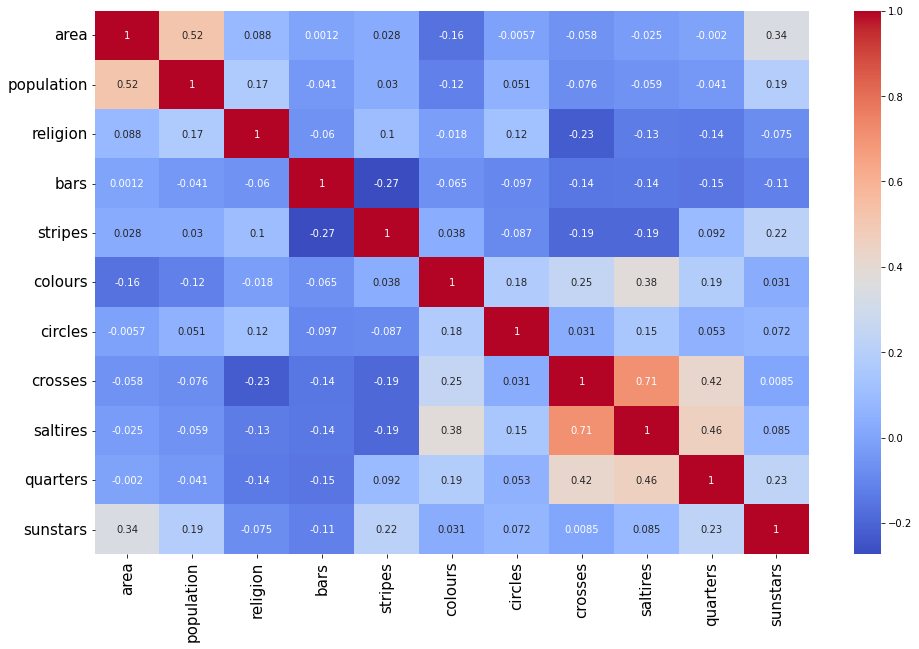

In [242]:
fig = plt.figure(figsize=(16, 10))
sns.heatmap(df.drop(categorical_columns, axis=1).corr(),cmap='coolwarm', annot=True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

Сильно cкоррелированных признаков (>80%) нет

In [243]:
df[numerical_columns].shape

(194, 10)

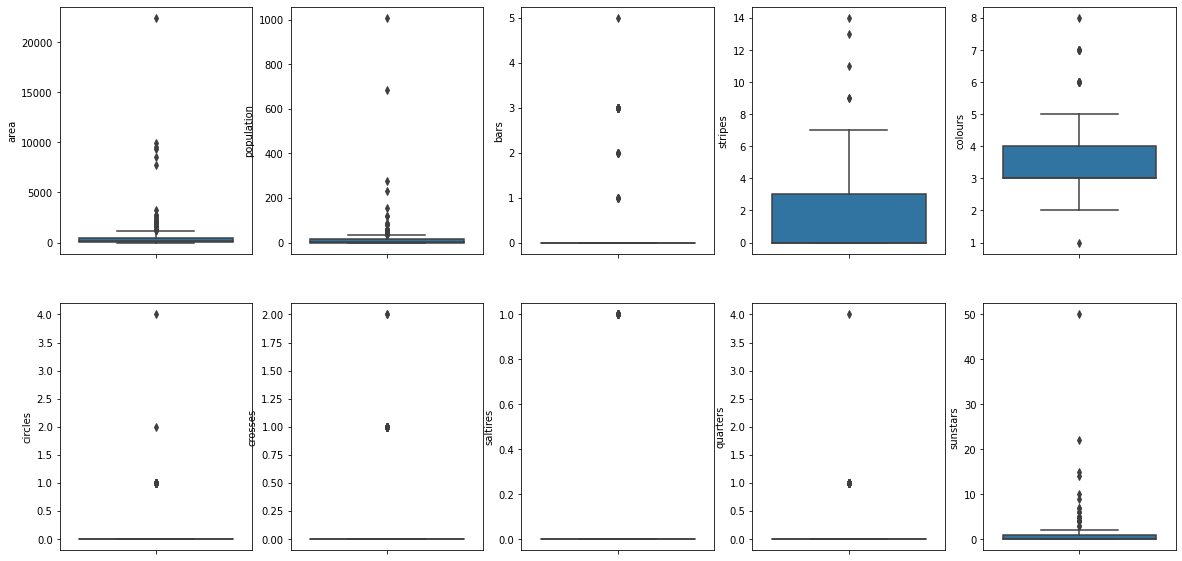

In [244]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for cnt, col in enumerate(df[numerical_columns]):
    sns.boxplot(ax=ax[cnt//5, cnt % 5], y=col, data=df)

In [245]:
for cnt, col in enumerate(df[numerical_columns]):
    print(col, df[col].nunique())

area 136
population 48
bars 5
stripes 12
colours 8
circles 4
crosses 3
saltires 2
quarters 3
sunstars 14


In [246]:
df[df['area']==0].shape, df[df['population']==0].shape

((34, 30), (56, 30))

In [247]:
df[(df['population']==0) & (df['area']==0)].shape

(34, 30)

У части объектов отсутствует информация о площади и численности населения

Применим к этим признакам Indicator Method для индикации отсутствующих значений

In [248]:
df.loc[:, 'indicator_area'] = 0
df.loc[df['area']==0, 'indicator_area'] = 1

df.loc[:, 'indicator_population'] = 0
df.loc[df['population']==0, 'indicator_population'] = 1

categorical_columns += ['indicator_area', 'indicator_population']

[2 6 1 0 5 3 4 7]


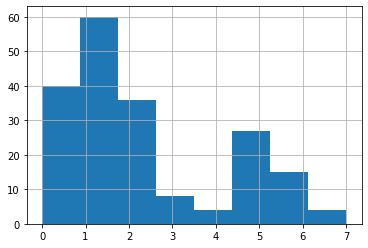

In [249]:
print(df.religion.unique())
df.religion.hist(bins=8)

Классы не сбалансированы

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

Применим метод oversampling для балансировки классов

In [250]:
# признак 'name' убирем из рассмотрения, все значения уникальны
categorical_columns.remove('name')

df_ohe = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
X = df_ohe.drop(['religion', 'name'], axis=1)
y = df_ohe.religion
print(Counter(y))

Counter({1: 60, 0: 40, 2: 36, 5: 27, 6: 15, 3: 8, 4: 4, 7: 4})


In [251]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({2: 60, 6: 60, 1: 60, 0: 60, 5: 60, 3: 60, 4: 60, 7: 60})


# Modeling

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=SEED)
X_over.shape

(480, 61)

## LGBM

In [253]:
pipe_lgbm = Pipeline([('scaler', StandardScaler()), ('lgbm', lgbm.LGBMClassifier(random_state=SEED))])
pipe_lgbm.fit(X_train, y_train)
print(classification_report(y_test, pipe_lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        14
           5       0.80      1.00      0.89        12
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.97        96
   macro avg       0.97      0.96      0.96        96
weighted avg       0.97      0.97      0.97        96



## RF

In [254]:
pipe_rf = Pipeline([('RF', RandomForestClassifier(random_state=SEED))])
pipe_rf.fit(X_train, y_train)
print(classification_report(y_test, pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.80      0.80      0.80        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        14
           5       0.86      1.00      0.92        12
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.96        96
   macro avg       0.96      0.95      0.95        96
weighted avg       0.96      0.96      0.96        96



## SVM

In [255]:
pipe_svm = Pipeline([('scaler', StandardScaler()), ('SVM', LinearSVC(max_iter=10000, random_state=SEED))])
pipe_svm.fit(X_train, y_train)
print(classification_report(y_test, pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      0.70      0.78        10
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        14
           5       0.86      1.00      0.92        12
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.96        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.96      0.96      0.96        96



## Stacking

In [256]:
estimators = [
    ('pipe_lgbm', pipe_lgbm),
    ('pipe_rf', pipe_rf),
    ('pipe_svm', pipe_svm),
    ]
    
stackc = StackingClassifier(estimators=estimators).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [257]:
print(classification_report(y_test, stackc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.80      0.80      0.80        10
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        14
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        14

    accuracy                           0.96        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.96      0.96      0.96        96



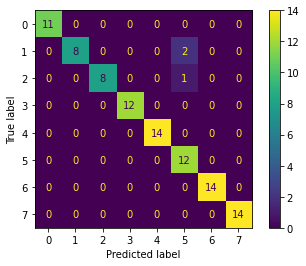

In [258]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pipe_lgbm.predict(X_test), labels=pipe_lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe_lgbm.classes_)
disp.plot()

plt.show()